In [1]:
import sys; sys.path.insert(0, '..')
from dot_plots import *

%matplotlib widget

In [2]:
TL= '2'
TC= '4'
layers = 10

(Numbers, 
Major_Grid_x, Major_Grid_y,
Minor_Grid_x, Minor_Grid_y,
Sending_Grid_x, Sending_Grid_y,
Recieivng_Grid_x, Recieivng_Grid_y,
Line_Grid_px, Line_Grid_py,
Letters) = calcualte_numbers_and_grids_and_lines(TL,TC,layers)
float_Numbers = [float(n) for n in Numbers]

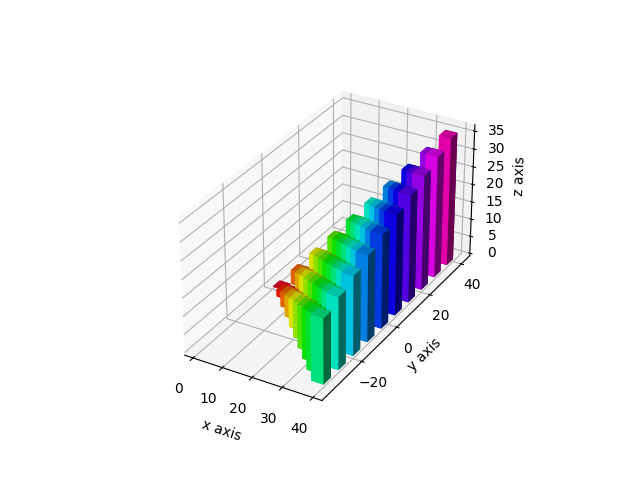

In [3]:
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

x3 = Major_Grid_x[:len(Numbers)]#[1,2,3,4,5,6,7,8,9,10]
y3 = Major_Grid_y[:len(Numbers)]#[5,6,7,8,2,5,6,3,7,2]
z3 = np.zeros(len(Numbers))

dx = np.ones(len(Numbers))*4
dy = np.ones(len(Numbers))*4
dz = float_Numbers

ax1.set_box_aspect((np.ptp([0,1]), np.ptp([0,2]), np.ptp([0,1])))

bar_val_min = 0
bar_val_max = max(Numbers)

cmap = cm.gist_rainbow
norm = mpl.colors.Normalize(vmin=0, vmax=bar_val_max)
ax1.bar3d(x3, y3, z3, dx, dy, dz , color=cmap(norm(float_Numbers)))


ax1.set_xlabel('x axis')
ax1.set_ylabel('y axis')
ax1.set_zlabel('z axis')

plt.show()